In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import requests
import datetime
#from datetime import datetime
import time

### Importo dai csv OHLC e volume. Time period Mar 2020 - Mar 2021

In [2]:
open_df = pd.read_csv('data/open_2020-03-08_2021-03-08_4638', index_col='date')
high_df = pd.read_csv('data/high_2020-03-08_2021-03-08_4638', index_col='date')
low_df = pd.read_csv('data/low_2020-03-08_2021-03-08_4638', index_col='date')
adjclose_df = pd.read_csv('data/adjclose_2020-03-08_2021-03-08_4638', index_col='date')
volume_df = pd.read_csv('data/volume_2020-03-08_2021-03-08_4638', index_col='date')

In [3]:
adjclose_df.tail()

,A,AA,AACG,AAIC,AAL,AAMC,AAME,AAOI,AAON,AAP,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,124.480003,25.99,5.15,4.06,21.180000,23.639999,4.76,9.020,77.379997,162.660004,...,210.160004,1.33,35.220001,157.690002,47.060001,15.500,5.19,36.770000,4.66,14.690
2021-03-02,123.639999,27.50,5.07,4.08,21.440001,24.000000,4.70,8.625,74.919998,164.839996,...,202.610001,1.25,35.060001,157.050003,46.540001,15.290,5.29,36.610001,4.68,14.250
2021-03-03,119.300003,30.83,4.63,4.01,22.170000,23.049999,4.43,8.360,74.089996,165.830002,...,187.830002,1.22,34.799999,149.320007,46.330002,15.000,5.09,34.160000,4.51,14.250
2021-03-04,119.300003,30.83,4.63,4.01,22.170000,23.049999,4.43,8.360,74.089996,165.830002,...,188.960007,1.17,35.439999,147.960007,47.029999,14.955,5.09,34.500000,4.51,14.145
2021-03-05,119.300003,30.83,4.63,4.01,22.170000,23.049999,4.43,8.360,74.089996,165.830002,...,188.960007,1.17,35.439999,147.960007,47.029999,14.955,5.09,34.500000,4.51,14.145


### Importo lista dei financials più aggiornati dei ticker da FinViz

In [4]:
ticker_financials_df = pd.read_excel('data/ticker_isin_file_financials.xlsx', index_col=0)
ticker_financials_df.head()

,isin,exchange_id,Sector,Industry,Country,P/E,EPS (ttm),Insider Own,Shs Outstand,Shs Float,...,Income,Sales,Book/sh,P/B,ROA,Target Price,ROE,ROI,Employees,Debt/Eq
ticker,,,,,,,,,,,,,,,,,,,,,
FLWS,US68243Q1067,663,Consumer Cyclical,Specialty Retail,USA,34.57,0.96,0.2610,64320000.0,24070000,...,64500000,1590000000,6.09,5.46,0.079,35.43,0.163,0.125,4300.0,0.54
TXG,US88025U1097,663,Healthcare,Health Information Services,USA,NaN,-1.35,0.0210,101340000,71960000,...,-134300000,261900000,8.14,22.51,-0.189,157.50,-0.263,-0.068,713.0,0.00
YI,US68247Q1022,663,Healthcare,Health Information Services,China,NaN,-0.91,NaN,82430000,45810000,...,-74900000,1070000000,0.91,13.03,-0.246,12.00,-0.765,-0.562,1932.0,0.37
YQ,US81807M1062,663,Consumer Defensive,Education & Training Services,China,NaN,NaN,0.0231,191310000,50120000,...,-,154800000,NaN,NaN,NaN,NaN,NaN,0.227,2613.0,NaN
ATNF,US68236V1044,663,Healthcare,Biotechnology,USA,NaN,-1.00,0.2290,5180000,970000,...,-4700000,-,1.36,2.99,-0.388,NaN,-0.707,NaN,2.0,0.37


### Statistiche per settore
Nel Technology abbiamo 631 titoli in 3 mercati e 12 paesi. Hanno un'ottima percentuale di Shs Outstand e Market Cap popolate possiamo pensare di iniziare da qua

In [5]:
ticker_financials_df.groupby('Sector').nunique()

,isin,exchange_id,Industry,Country,P/E,EPS (ttm),Insider Own,Shs Outstand,Shs Float,Market Cap,Income,Sales,Book/sh,P/B,ROA,Target Price,ROE,ROI,Employees,Debt/Eq
Sector,,,,,,,,,,,,,,,,,,,,
Basic Materials,231,3,14,19,120,185,123,228,229,228,196,195,218,186,155,155,171,140,199,116
Communication Services,250,3,7,24,106,207,154,248,239,244,224,223,227,189,170,186,187,183,222,110
Consumer Cyclical,474,3,23,23,219,367,186,461,464,445,420,419,428,342,254,343,352,298,398,207
Consumer Defensive,210,3,12,13,136,176,112,207,204,203,188,194,196,157,130,147,162,158,192,112
Energy,237,3,8,21,64,210,133,231,233,233,219,223,229,160,186,166,198,172,193,118
Financial,784,3,16,25,498,462,242,722,662,733,580,605,634,288,160,444,294,318,578,192
Healthcare,1046,3,11,23,194,548,410,999,991,965,746,604,712,664,647,523,742,552,526,188
Industrials,559,3,25,22,323,416,212,547,540,521,494,498,511,389,270,389,389,299,451,215
Real Estate,211,3,12,6,125,177,93,211,208,199,200,203,200,153,113,171,151,108,148,143


All'interno del Technology vediamo come sono distriibuti per Industry. Nel Solar ci sono tante colonne valorizzate per tutti e 16 i titoli che la compongono (sempre 3 mercati diversi)

In [6]:
ticker_financials_df.loc[ticker_financials_df['Sector'] == 'Technology'].groupby('Industry').nunique()

,isin,exchange_id,Sector,Country,P/E,EPS (ttm),Insider Own,Shs Outstand,Shs Float,Market Cap,Income,Sales,Book/sh,P/B,ROA,Target Price,ROE,ROI,Employees,Debt/Eq
Industry,,,,,,,,,,,,,,,,,,,,
Communication Equipment,65,3,1,6,20,60,46,65,65,65,62,65,64,56,61,47,60,59,63,36
Computer Hardware,27,2,1,7,11,26,19,27,27,27,27,27,26,24,23,19,24,25,27,18
Consumer Electronics,14,3,1,4,7,14,13,14,14,14,14,14,14,14,14,12,14,14,14,12
Electronic Components,36,3,1,9,26,35,30,36,36,35,35,36,36,36,31,27,32,34,36,26
Electronics & Computer Distribution,7,2,1,1,4,7,6,7,7,7,7,7,7,7,5,4,6,7,7,6
Information Technology Services,64,3,1,11,40,62,40,64,64,63,64,60,58,55,54,53,59,58,63,45
Scientific & Technical Instruments,32,2,1,4,19,32,26,32,32,32,32,32,32,31,30,23,31,31,31,18
Semiconductor Equipment & Materials,30,3,1,5,20,29,25,30,30,29,30,30,28,30,30,24,29,28,29,22
Semiconductors,64,3,1,9,41,57,38,64,64,64,63,64,61,61,57,59,58,59,62,38


In [7]:
tech_solar_financials_df = ticker_financials_df.loc[(ticker_financials_df['Sector'] == 'Technology') & (ticker_financials_df['Industry'] == 'Solar')]
tech_solar_financials_df

,isin,exchange_id,Sector,Industry,Country,P/E,EPS (ttm),Insider Own,Shs Outstand,Shs Float,...,Income,Sales,Book/sh,P/B,ROA,Target Price,ROE,ROI,Employees,Debt/Eq
ticker,,,,,,,,,,,,,,,,,,,,,
ARRY,US04271T1007,663,Technology,Solar,USA,64.22,0.75,0.0040,123640000,99100000,...,95600000,916800000,3.14,15.38,NaN,50.05,NaN,0.145,369.0,0.00
BEEM,US07373B1098,663,Technology,Solar,USA,NaN,-0.77,0.0200,6620000,5880000,...,-4300000,4500000,2.25,26.23,-0.437,48.33,-0.558,-0.546,26.0,0.02
CSIQ,CA1366351098,663,Technology,Solar,Canada,17.43,3.48,0.3100,59750000,45050000,...,207800000,3360000000,25.12,2.41,0.037,50.43,0.142,0.057,13478.0,1.84
ENPH,US29355A1079,663,Technology,Solar,USA,158.88,1.28,0.0170,126110000,115210000,...,177700000,719600000,3.30,61.43,0.185,170.75,0.517,0.460,577.0,0.87
FSLR,US3364331070,663,Technology,Solar,USA,50.26,2.09,0.0860,105970000,93310000,...,223200000,3500000000,50.92,2.06,0.031,84.76,0.043,-0.028,6600.0,0.05
ISUN,US4652461066,663,Technology,Solar,USA,NaN,-0.32,NaN,5300000,2970000,...,-1700000,18100000,1.35,19.83,-0.091,NaN,-0.298,-0.019,50.0,1.25
JKS,US47759T1007,676,Technology,Solar,China,21.29,3.19,0.0100,44500000,42830000,...,151200000,5450000000,34.34,1.98,0.020,49.35,0.101,0.051,15195.0,2.53
MAXN,SGXZ25336314,663,Technology,Solar,Singapore,NaN,NaN,0.5944,24770000,13590000,...,-,967400000,19.32,2.28,NaN,33.67,NaN,-0.344,5194.0,0.36
SOL,US75971T3014,676,Technology,Solar,USA,NaN,-0.07,NaN,107660000,19890000,...,-10100000,83600000,21.23,1.23,-0.034,9.25,-0.106,-0.011,222.0,0.89


### Nei dataset facciamo il drop dell'ultimo girono che è duplicato

In [8]:
open_df.duplicated()

date
2020-03-09    False
2020-03-10    False
2020-03-11    False
2020-03-12    False
2020-03-13    False
              ...  
2021-03-01    False
2021-03-02    False
2021-03-03    False
2021-03-04    False
2021-03-05     True
Length: 251, dtype: bool

In [9]:
open_df.drop(index='2021-03-05', inplace=True)
high_df.drop(index='2021-03-05', inplace=True)
low_df.drop(index='2021-03-05', inplace=True)
adjclose_df.drop(index='2021-03-05', inplace=True)
volume_df.drop(index='2021-03-05', inplace=True)

In [10]:
if open_df.isnull().values.any():
    print('open shape before: ', open_df.shape)
    open_df.dropna(axis=1, how='any', inplace=True)
    print('open shape after: ', open_df.shape)    
if high_df.isnull().values.any():
    print('high shape before: ', high_df.shape)
    high_df.dropna(axis=1, how='any', inplace=True)
    print('high shape after: ', high_df.shape)  
if low_df.isnull().values.any():
    print('low shape before: ', low_df.shape)
    low_df.dropna(axis=1, how='any', inplace=True)
    print('low shape after: ', low_df.shape)    
if adjclose_df.isnull().values.any():
    print('high shape before: ', adjclose_df.shape)
    adjclose_df.dropna(axis=1, how='any', inplace=True)
    print('high shape after: ', adjclose_df.shape) 
if volume_df.isnull().values.any():
    print('high shape before: ', volume_df.shape)
    volume_df.dropna(axis=1, how='any', inplace=True)
    print('high shape after: ', volume_df.shape)   

open shape before:  (250, 4638)
open shape after:  (250, 4635)
high shape before:  (250, 4638)
high shape after:  (250, 4635)
low shape before:  (250, 4638)
low shape after:  (250, 4635)
high shape before:  (250, 4638)
high shape after:  (250, 4635)
high shape before:  (250, 4638)
high shape after:  (250, 4635)


### Confrontiamo i ticker del df dei financials con quello dei prezzi. Eliminiamo i titoli che non matchano

In [11]:
df_columns = open_df.columns
df_columns

Index(['A', 'AA', 'AACG', 'AAIC', 'AAL', 'AAMC', 'AAME', 'AAOI', 'AAON', 'AAP',
       ...
       'ZS', 'ZSAN', 'ZTO', 'ZTS', 'ZUMZ', 'ZUO', 'ZVO', 'ZYME', 'ZYNE',
       'ZYXI'],
      dtype='object', length=4635)

In [12]:
tech_solar_financials_index = tech_solar_financials_df.index
tech_solar_financials_index

Index(['ARRY', 'BEEM', 'CSIQ', 'ENPH', 'FSLR', 'ISUN', 'JKS', 'MAXN', 'SOL',
       'SEDG', 'SPI', 'NOVA', 'SPWR', 'RUN', 'SUNW', 'VVPR'],
      dtype='object', name='ticker')

In [13]:
unmatch = list(set(tech_solar_financials_index) - set(df_columns))

In [14]:
tech_solar_financials_df.drop(unmatch, inplace=True)
tech_solar_financials_df

,isin,exchange_id,Sector,Industry,Country,P/E,EPS (ttm),Insider Own,Shs Outstand,Shs Float,...,Income,Sales,Book/sh,P/B,ROA,Target Price,ROE,ROI,Employees,Debt/Eq
ticker,,,,,,,,,,,,,,,,,,,,,
CSIQ,CA1366351098,663,Technology,Solar,Canada,17.43,3.48,0.3100,59750000,45050000,...,207800000,3360000000,25.12,2.41,0.037,50.43,0.142,0.057,13478.0,1.84
ENPH,US29355A1079,663,Technology,Solar,USA,158.88,1.28,0.0170,126110000,115210000,...,177700000,719600000,3.30,61.43,0.185,170.75,0.517,0.460,577.0,0.87
FSLR,US3364331070,663,Technology,Solar,USA,50.26,2.09,0.0860,105970000,93310000,...,223200000,3500000000,50.92,2.06,0.031,84.76,0.043,-0.028,6600.0,0.05
JKS,US47759T1007,676,Technology,Solar,China,21.29,3.19,0.0100,44500000,42830000,...,151200000,5450000000,34.34,1.98,0.020,49.35,0.101,0.051,15195.0,2.53
SOL,US75971T3014,676,Technology,Solar,USA,NaN,-0.07,NaN,107660000,19890000,...,-10100000,83600000,21.23,1.23,-0.034,9.25,-0.106,-0.011,222.0,0.89
SEDG,US83417M1045,663,Technology,Solar,Israel,92.79,3.34,0.0140,50530000,49940000,...,174200000,1520000000,20.42,15.19,0.102,281.18,0.193,0.187,2431.0,0.57
SPI,KYG8651P1101,663,Technology,Solar,Hong Kong,NaN,-0.33,0.4116,14810000,7430000,...,-4700000,104500000,-0.17,NaN,-0.026,NaN,1.088,-0.159,63.0,NaN
NOVA,US86745K1043,676,Technology,Solar,USA,NaN,-2.09,0.0040,87770000,66180000.0,...,-178000000,156400000,8.23,6.05,-0.064,52.73,-0.272,-0.016,324.0,2.64
SPWR,US8676524064,663,Technology,Solar,USA,45.82,1.03,0.0060,170110000,80970000,...,192300000,1390000000,-0.06,NaN,0.032,24.05,5.885,-0.126,8400.0,NaN


In [15]:
open_df = open_df[tech_solar_financials_df.index]
high_df = high_df[tech_solar_financials_df.index]
low_df = low_df[tech_solar_financials_df.index]
adjclose_df = adjclose_df[tech_solar_financials_df.index]
volume_df = volume_df[tech_solar_financials_df.index]

In [16]:
open_df_t = open_df.transpose()
open_df_stack = open_df_t.stack()

high_df_t = high_df.transpose()
high_df_stack = high_df_t.stack()

low_df_t = low_df.transpose()
low_df_stack = low_df_t.stack()

adjclose_df_t = adjclose_df.transpose()
adjclose_df_stack = adjclose_df_t.stack()

volume_df_t = volume_df.transpose()
volume_df_stack = volume_df_t.stack()

In [21]:
adjclose_df_stack

      date      
CSIQ  2020-03-09    17.350000
      2020-03-10    18.209999
      2020-03-11    17.889999
      2020-03-12    16.280001
      2020-03-13    16.799999
                      ...    
VVPR  2021-02-26     9.670000
      2021-03-01     9.670000
      2021-03-02     9.430000
      2021-03-03     8.200000
      2021-03-04     8.060000
Length: 3000, dtype: float64

In [29]:
adjclose_df_stack.index.get_level_values(0).unique()

Index(['CSIQ', 'ENPH', 'FSLR', 'JKS', 'SOL', 'SEDG', 'SPI', 'NOVA', 'SPWR',
       'RUN', 'SUNW', 'VVPR'],
      dtype='object')

In [19]:
tech_solar_price_df = {'open': open_df_stack, 
        'high': high_df_stack,
        'low': low_df_stack,
        'adjclose': adjclose_df_stack,
        'volume': volume_df_stack}  
tech_solar_price_df = pd.concat(tech_solar_price_df, axis=1)
tech_solar_price_df

open       high        low   adjclose     volume
     date                                                             
CSIQ 2020-03-09  18.719999  18.790001  17.250000  17.350000  1280500.0
     2020-03-10  18.309999  18.450001  17.480000  18.209999   613300.0
     2020-03-11  17.670000  18.150000  16.940001  17.889999  1065300.0
     2020-03-12  15.950000  17.100000  15.880000  16.280001  1026100.0
     2020-03-13  17.180000  17.490000  15.400000  16.799999  1364500.0
...                    ...        ...        ...        ...        ...
VVPR 2021-02-26   9.520000  10.150000   9.500000   9.670000   195700.0
     2021-03-01   9.960000  10.250000   9.530000   9.670000   255100.0
     2021-03-02   9.780000   9.898000   9.430000   9.430000   190200.0
     2021-03-03   9.540000   9.685000   7.990000   8.200000   469700.0
     2021-03-04   9.540000   8.100000   7.820000   8.060000    28201.0

[3000 rows x 5 columns]

In [34]:
tech_solar_price_df.index.set_names('ticker', level=0, inplace=True)

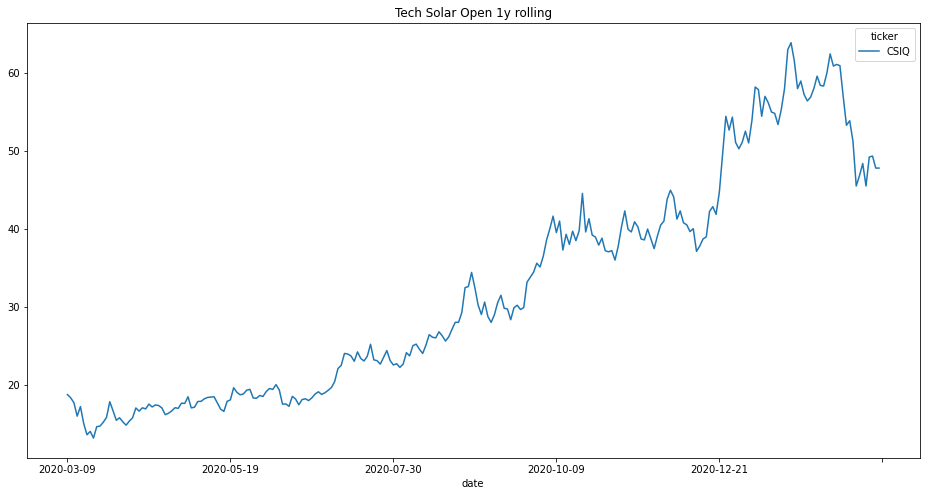

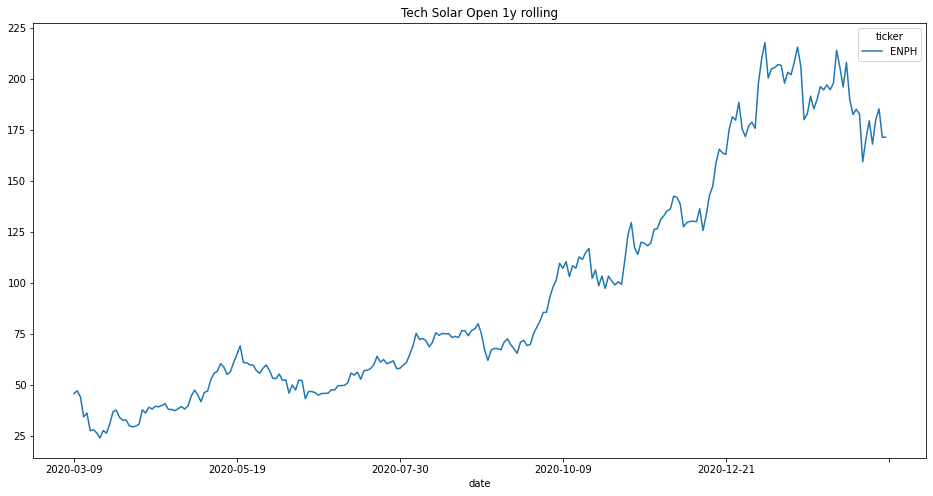

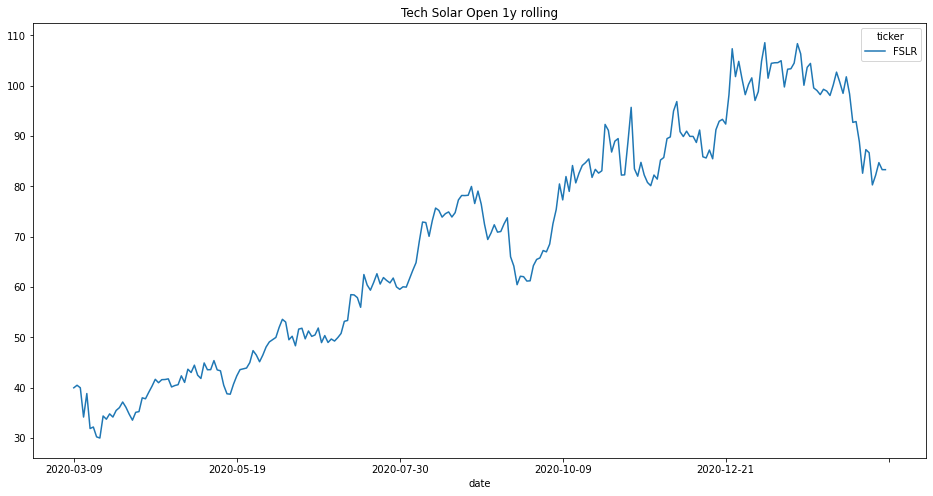

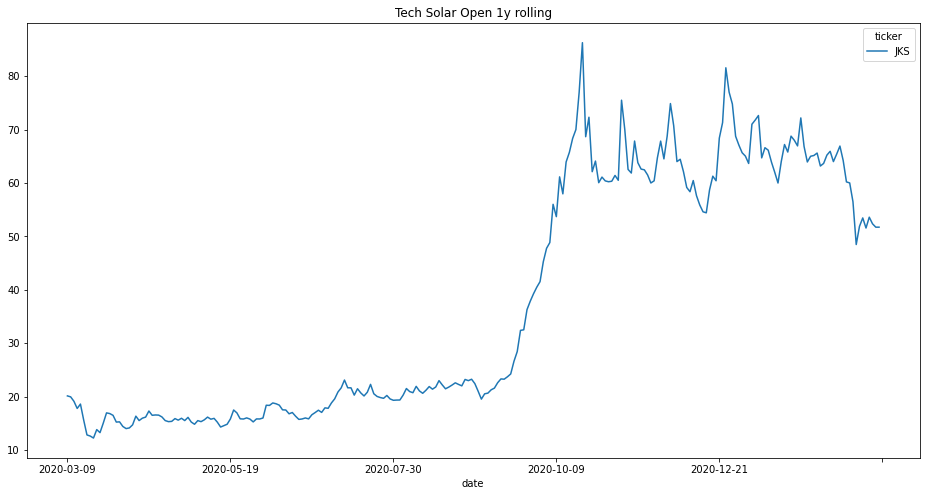

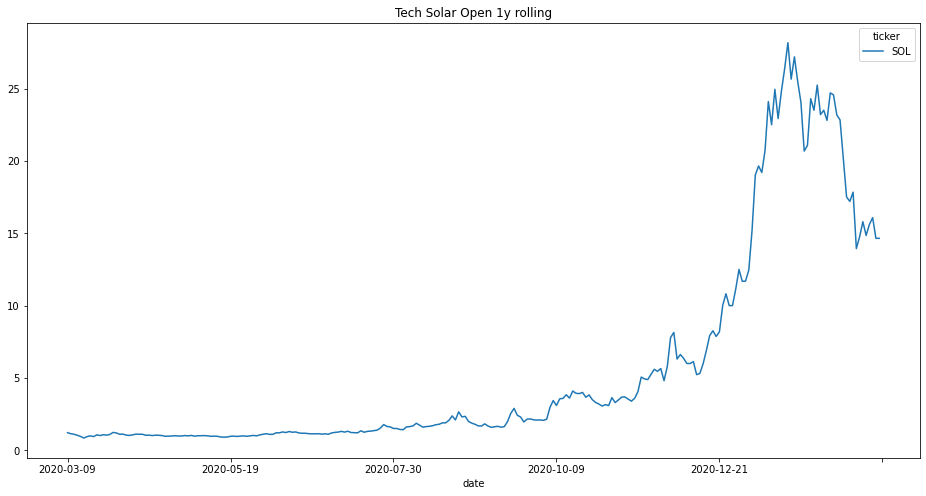

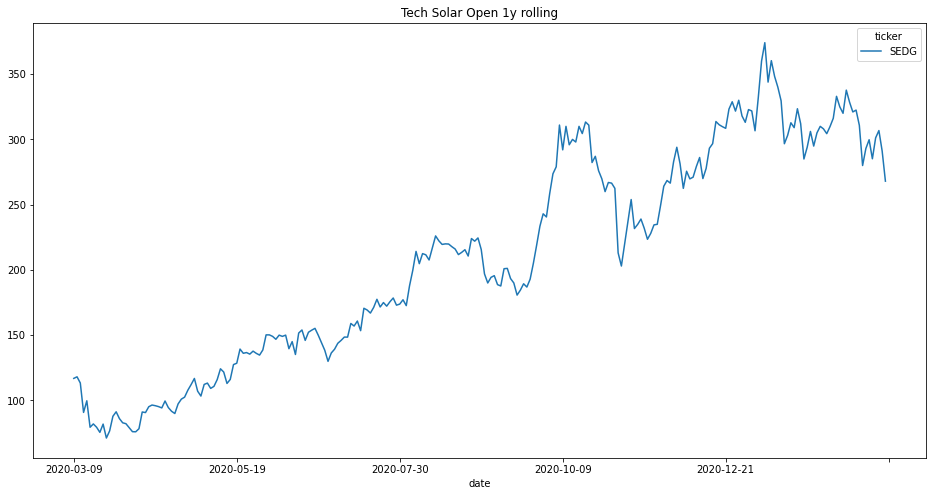

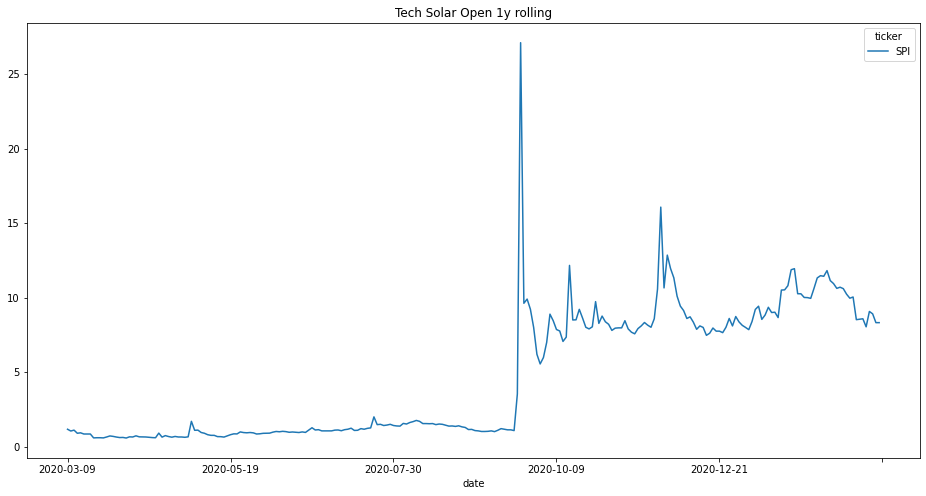

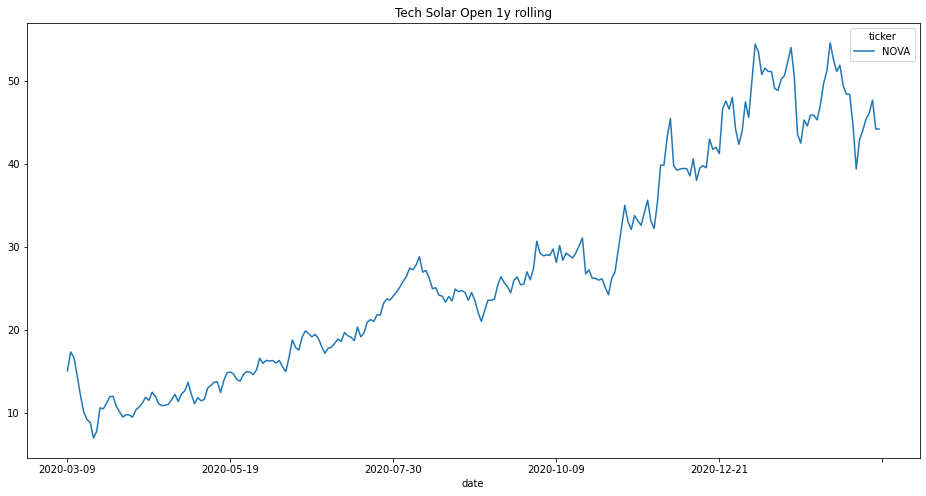

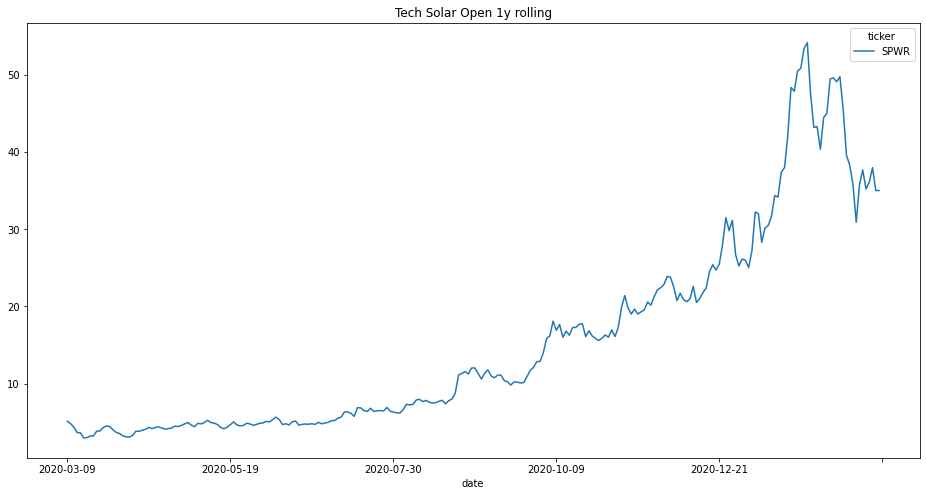

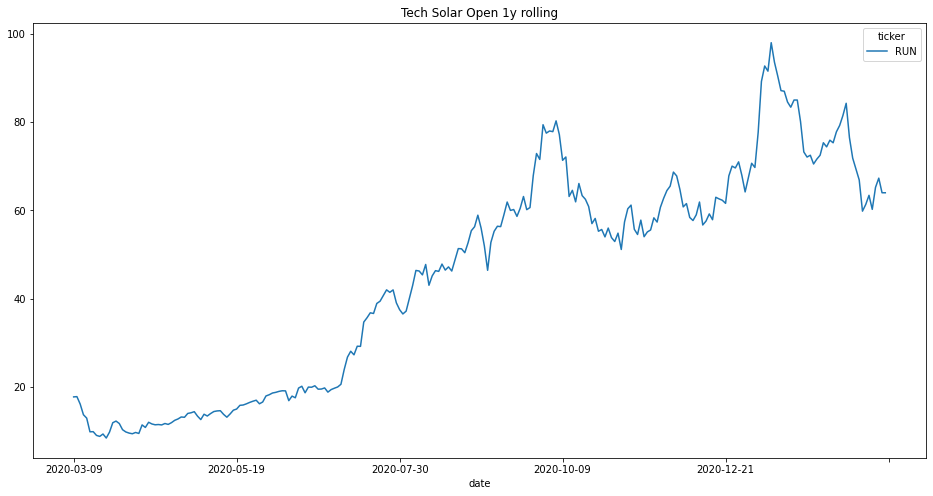

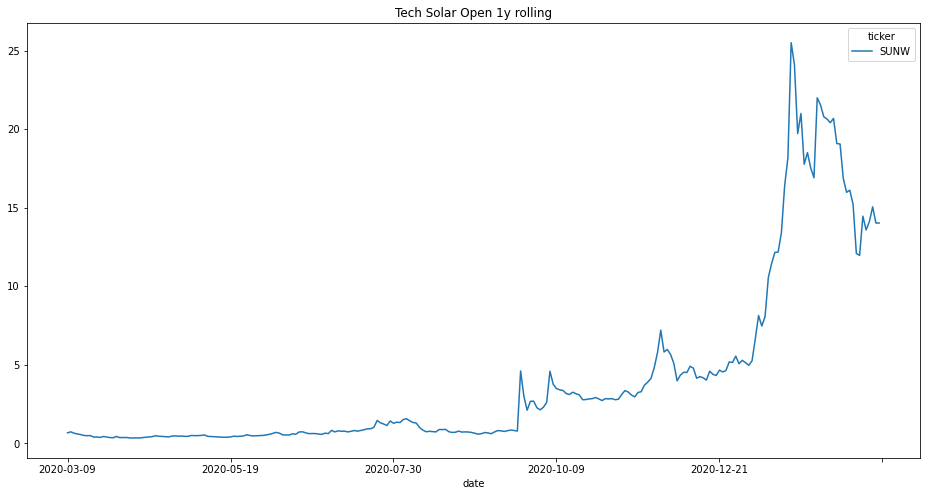

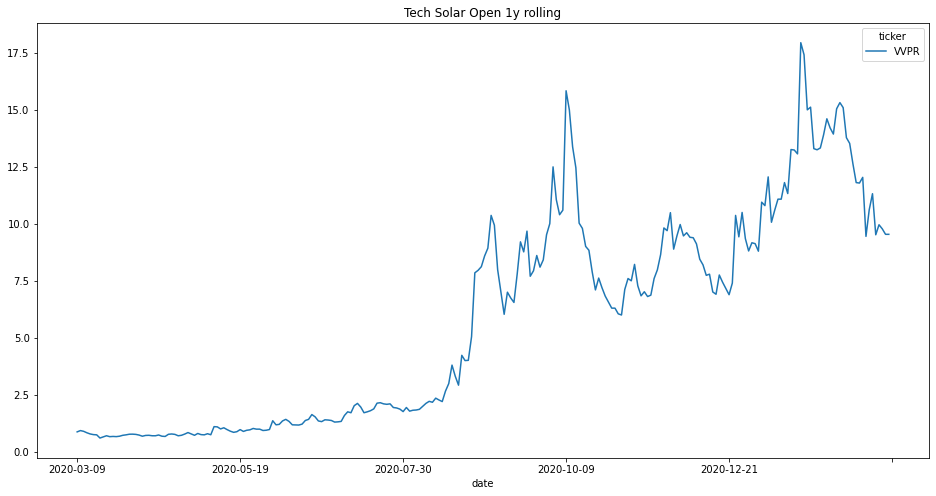

In [52]:
for i in tech_solar_price_df.index.get_level_values(0).unique():
    tech_solar_price_df.loc[[i]].reset_index().pivot(index="date", columns='ticker', values="open").plot(figsize=(16,8))
    plt.title("Tech Solar Open 1y rolling")
    plt.show()

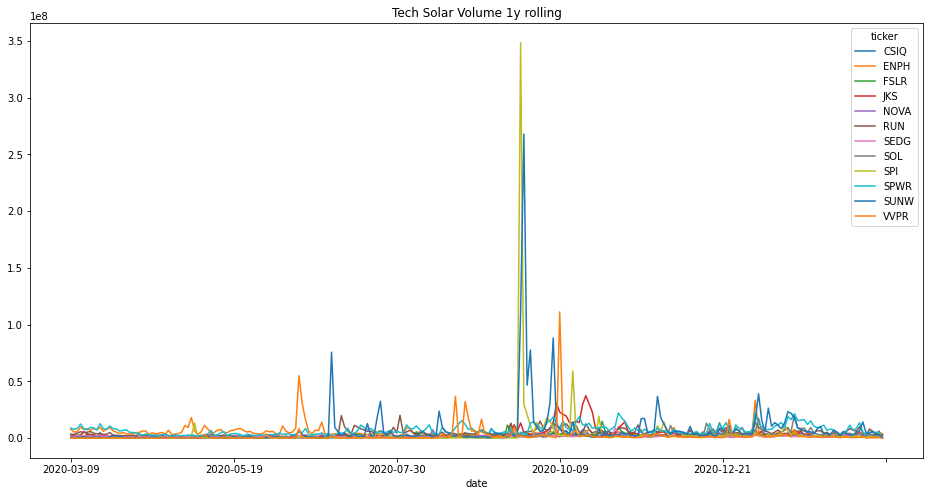

In [41]:
tech_solar_price_df.reset_index().pivot(index="date", columns='ticker', values="volume").plot(figsize=(16,8))
plt.title("Tech Solar Volume 1y rolling")
plt.show()

In [ ]:
adjclose_rel_var = (adjclose_df-open_df)/open_df
adjclose_rel_var.tail()

In [ ]:
high_low_var = (high_df-low_df)
high_low_var.tail()

In [ ]:
from sklearn import preprocessing

In [ ]:
# standardization
preprocessing.scale(high_low_var)

In [ ]:
# possiamo procedere con lo scaling tramite scikit-learn:
high_low_var_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
high_low_var_scaled = high_low_var_scaler.fit_transform(high_low_var)
high_low_var_scaled

In [ ]:
df = pd.DataFrame(data=high_low_var_scaled, index=high_low_var.index, columns=high_low_var.columns)
df

In [ ]:
df_concat.isnull().values.any()

In [ ]:
df_concat_dummy = df_concat
df_concat_dummy

In [ ]:
df_concat_dummy['dummy'] = df_concat_dummy['adjclose'] - df_concat_dummy['open']
df_concat_dummy

In [ ]:
df_concat_dummy.loc[df_concat_dummy.dummy < 0, 'dummy'] = 0
df_concat_dummy.loc[df_concat_dummy.dummy > 0, 'dummy'] = 1
df_concat_dummy

In [ ]:
df_concat_dummy.index

In [ ]:
# Select one stock 
df_concat_dummy.xs('A')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 4)

In [ ]:
kmeans.fit(df_concat_dummy.xs('A'))

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
cl1 = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12345)
    kmeans.fit(df_concat_dummy.xs('A'))
    
    cl1.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), cl1)
plt.title('Elbow method')
plt.xlabel('Numero di cluster')
plt.ylabel('Var')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(kmeans.labels_, cl_n))
print(classification_report(kmeans.labels_, cl_n))

In [ ]:
pip install keras